<a href="https://colab.research.google.com/github/UnitForDataScience/Projects-Fall-2024/blob/main/FGADR_Seg_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 # Diabetic Retonpathy


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#drive.flush_and_unmount()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight

import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

## Binary Classification

In [33]:
# Define directory paths
base_dir = '/content/drive/MyDrive/Projects /Projects-Fall-2024/RetinoVision/FGADR-Seg-set_Release/Seg-set/'
images_dir = os.path.join(base_dir, 'Original_Images')
labels_csv_path = os.path.join(base_dir, 'labels.csv')

df_labels = pd.read_csv(labels_csv_path)
df_labels['binary'] = df_labels['binary'].astype(str)

# Create image data generator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [34]:
# Prepare training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe=df_labels,
    directory=images_dir,
    x_col='name',
    y_col='binary',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Prepare validation data generator
validation_generator = datagen.flow_from_dataframe(
    dataframe=df_labels,
    directory=images_dir,
    x_col='name',
    y_col='binary',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

Found 1474 validated image filenames belonging to 2 classes.
Found 368 validated image filenames belonging to 2 classes.


In [ ]:
# Build CNN model for binary classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 1 neuron for binary classification
])

In [ ]:
# Compile model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Model summary
model.summary()

In [37]:
# Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.9370 - loss: 0.3416 - val_accuracy: 0.9511 - val_loss: 0.1761
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.9554 - loss: 0.1741 - val_accuracy: 0.9511 - val_loss: 0.1727
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 207s 4s/step - accuracy: 0.9437 - loss: 0.2067 - val_accuracy: 0.9511 - val_loss: 0.1635
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.9400 - loss: 0.2006 - val_accuracy: 0.9511 - val_loss: 0.1866
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 186s 4s/step - accuracy: 0.9544 - loss: 0.1658 - val_accuracy: 0.9511 - val_loss: 0.1616
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 220s 4s/step - accuracy: 0.9452 - loss: 0.1918 - val_accuracy: 0.9511 - val_loss: 0.2027
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 0.9509 - loss: 0.1796 - val_accuracy: 0.9511 - val_loss: 0.1770
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.9439 - loss: 0.1985 - val_accuracy: 0.9511 - val_loss: 0.

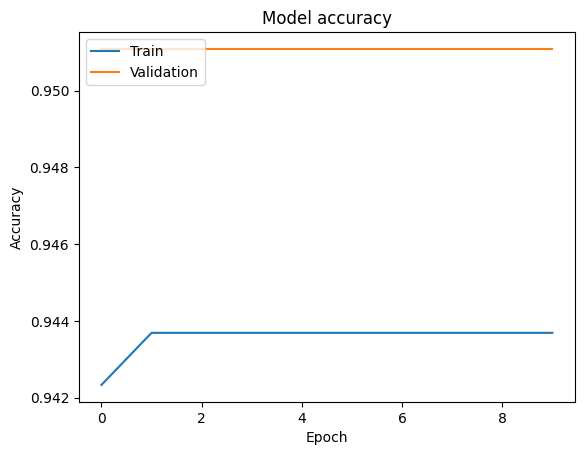

In [40]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

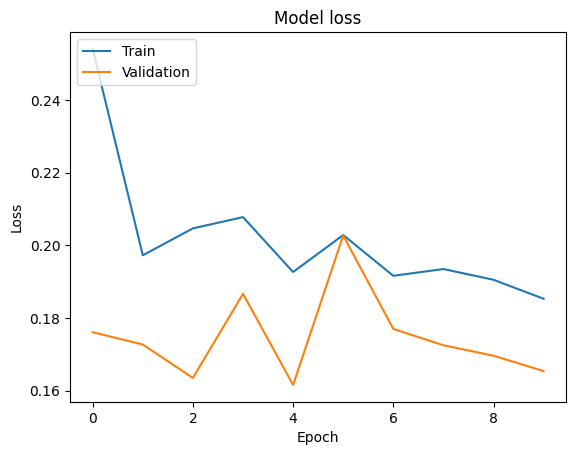

In [41]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()